<a href="https://colab.research.google.com/github/SahilR02/ADS-Experiments/blob/main/ADS%20Experiment%207/ADS_Exp7_SahilR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ADS Experiment No.7**

**Importing required libraries**

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [64]:
#load the data
from statsmodels.tsa.arima_model import ARMA
data=pd.read_csv("Monthly_Beer_Prod.csv")
data.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [65]:
# DataFrame info
print("\nDataFrame info:")
print(data.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB
None


In [66]:
# Display summary statistics
print(data.describe())

       Monthly beer production
count               476.000000
mean                136.395378
std                  33.738725
min                  64.800000
25%                 112.900000
50%                 139.150000
75%                 158.825000
max                 217.800000


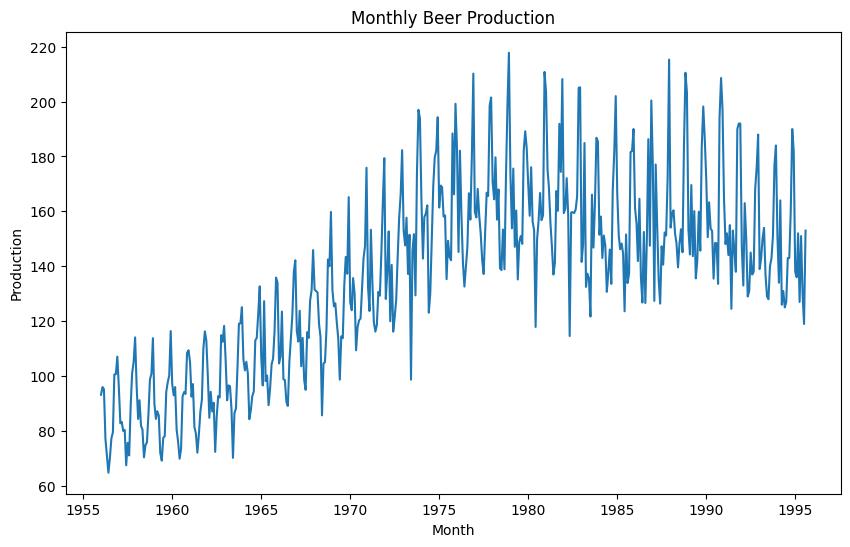

In [68]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Monthly Beer Production')
plt.xlabel('Month')
plt.ylabel('Production')
plt.show()

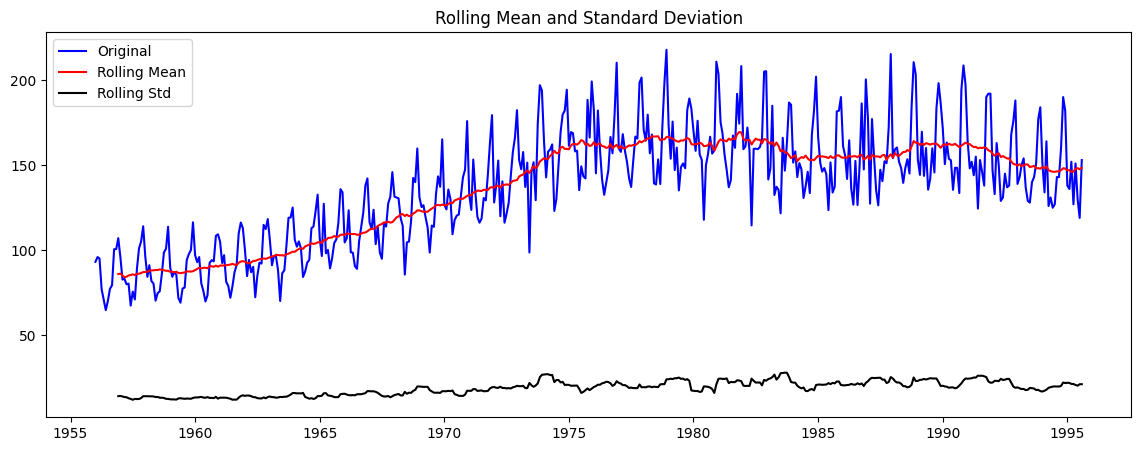

In [69]:
# Calculate rolling mean and rolling standard deviation
rollmean = data['Monthly beer production'].rolling(12).mean()
rollstd = data['Monthly beer production'].rolling(12).std()

# Plot rolling statistics
plt.figure(figsize=(14, 5))

# Plot original data
plt.plot(data['Monthly beer production'], color='blue', label='Original')

# Plot rolling mean and rolling standard deviation
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

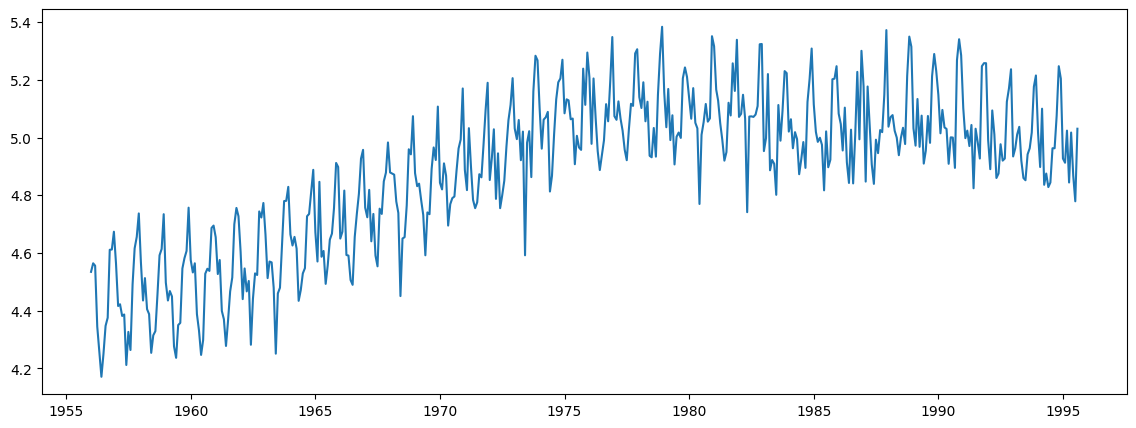

In [70]:
#make data stationary
plt.figure(figsize=(14,5))
fig=plt.figure(1)

beer_log=np.log(data)
plt.plot(beer_log)

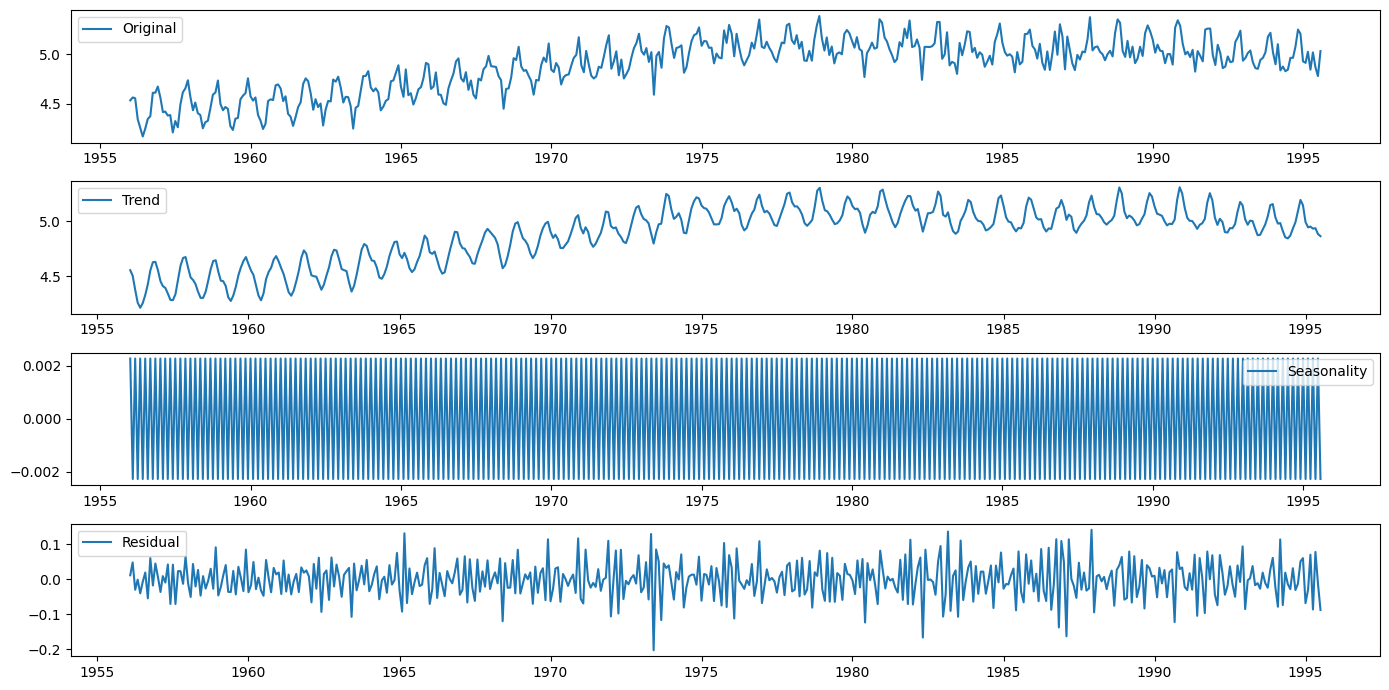

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

beer_log = data['Monthly beer production'].apply(np.log)

# Perform decomposition
decomposition = seasonal_decompose(beer_log, period=2)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(14,7))

plt.subplot(411)
plt.plot(beer_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

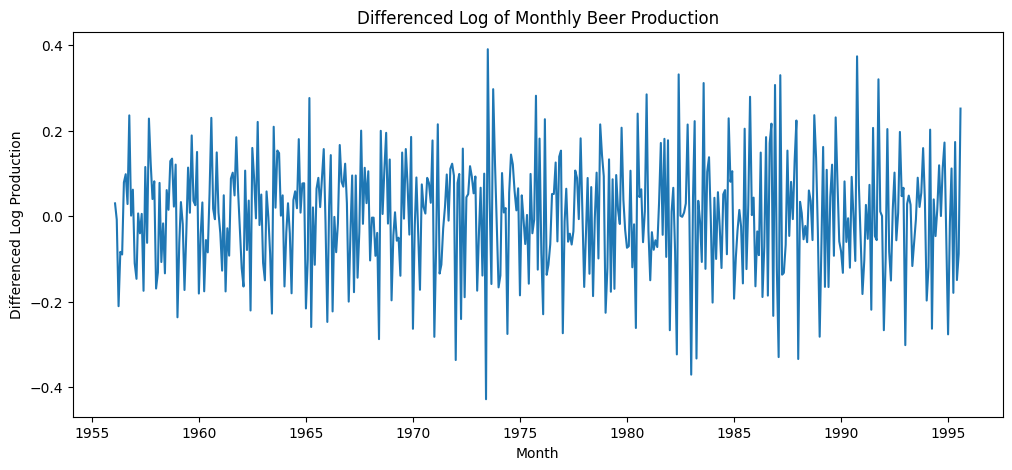

In [72]:
beer_log = data['Monthly beer production'].apply(np.log)

# Perform differencing
beer_log_diff = beer_log - beer_log.shift()

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(beer_log_diff)
plt.title('Differenced Log of Monthly Beer Production')
plt.xlabel('Month')
plt.ylabel('Differenced Log Production')
plt.show()

# Calculate rolling mean and rolling standard deviation of the differenced series
rollmean = beer_log_diff.rolling(12).mean()
rollstd = beer_log_diff.rolling(12).std()

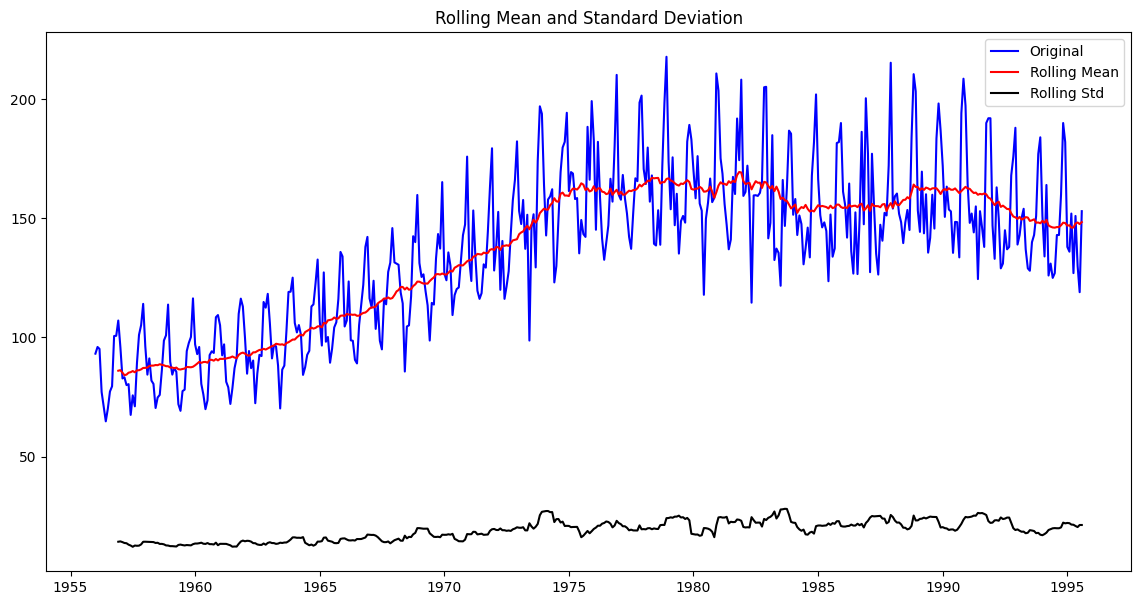

In [73]:
rollmean = data['Monthly beer production'].rolling(12).mean()
rollstd = data['Monthly beer production'].rolling(12).std()

# Plot rolling statistics
plt.figure(figsize=(14, 7))
orig = plt.plot(data['Monthly beer production'], color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [74]:
data.sort_index(inplace=True)

In [75]:
from statsmodels.tsa.stattools import acf,pacf
beer_acf=acf(beer_log_diff,nlags=20)
beer_pacf=pacf(beer_log_diff,nlags=20)

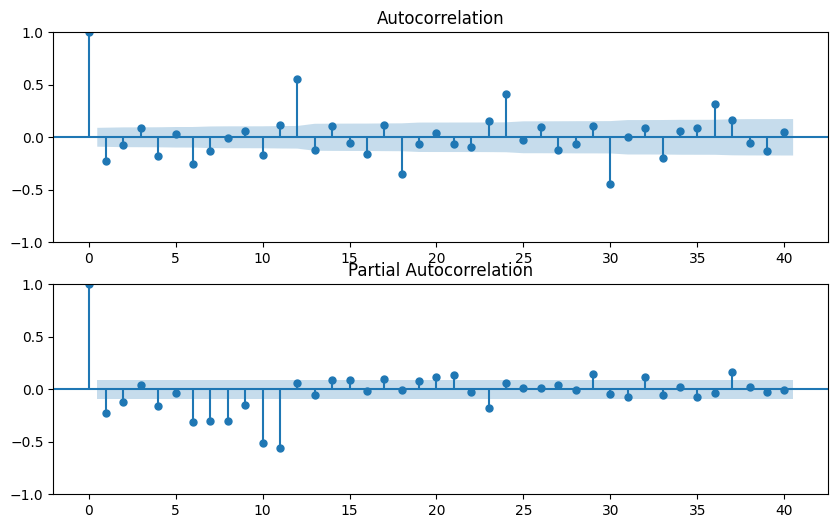

In [76]:
import statsmodels.api as sm
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(beer_log_diff.dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(beer_log_diff.dropna(),lags=40,ax=ax2)

**ARIMA**

In [77]:
!pip install pmdarima

import pmdarima as pm
def arimamodel(timeseries):
  automodel=pm.auto_arima(timeseries,start_p=3,start_q=3,max_p=5,max_q=5,test="adf",seasonal=True,trace=True)
  return automodel

In [78]:
arimamodel(beer_log)

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-586.114, Time=2.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=88.449, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-573.618, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-263.177, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2863.742, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-594.743, Time=1.98 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-588.796, Time=2.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-593.651, Time=2.02 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-653.090, Time=4.90 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-647.939, Time=4.76 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-647.066, Time=6.64 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=-643.181, Time=8.07 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=-639.145, Time=5.72 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=-647.014, Time=8.40 sec
 ARIMA(2,0,4)(0,0,0)[0]            

ARIMA(order=(2, 0, 4), scoring_args={}, suppress_warnings=True)

In [79]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(beer_log,order=(0,1,0))
results_ARIMA=model.fit()

In [80]:
#taking results back to original scale
ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues,copy=True)
ARIMA_diff_predictions.head()

Month
1956-01-01    0.000000
1956-02-01    4.534748
1956-03-01    4.564348
1956-04-01    4.555980
1956-05-01    4.345103
dtype: float64

In [81]:
#cumulative sum
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
ARIMA_diff_predictions_cumsum.head()

Month
1956-01-01     0.000000
1956-02-01     4.534748
1956-03-01     9.099096
1956-04-01    13.655076
1956-05-01    18.000179
dtype: float64

In [83]:
ARIMA_log_prediction=pd.Series(beer_log.iloc[0],index=beer_log.index)
ARIMA_log_prediction=ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Month
1956-01-01     4.534748
1956-02-01     9.069495
1956-03-01    13.633844
1956-04-01    18.189824
1956-05-01    22.534927
dtype: float64

In [82]:
results_ARIMA.predict(10,30)

1956-11-01    4.611152
1956-12-01    4.612146
1957-01-01    4.673763
1957-02-01    4.563306
1957-03-01    4.416428
1957-04-01    4.422449
1957-05-01    4.382027
1957-06-01    4.387014
1957-07-01    4.212128
1957-08-01    4.326778
1957-09-01    4.264087
1957-10-01    4.492001
1957-11-01    4.616110
1957-12-01    4.655863
1958-01-01    4.737075
1958-02-01    4.567468
1958-03-01    4.435567
1958-04-01    4.513055
1958-05-01    4.405499
1958-06-01    4.388257
1958-07-01    4.254193
Freq: MS, Name: predicted_mean, dtype: float64